In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter



In [172]:
# Создаем сферу с помощью параметрических уравнений
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
R = 6400e3/1.3
x = R * np.outer(np.cos(u), np.sin(v))
y = R * np.outer(np.sin(u), np.sin(v))
z = R * np.outer(np.ones(np.size(u)), np.cos(v))
# import Constants
# print(np.linalg.norm(Constants.ECEF) > R)


In [99]:
earth_texture = plt.imread('textures/8k_earth_daymap.jpg') / 255.0

In [5]:
import pandas as pd
from pandas._typing import FilePath


def load_df(name: FilePath, H):
    df = pd.read_csv(
        name,
        sep=';', header=None,
        names=['svId', 'gnssId', 'TOW', 'alm_x', 'alm_y', 'alm_z', 'eph_x', 'eph_y', 'eph_z',
               'elev', 'azim', 'doMes', 'cpMes', 'prMes',
               'alm_x1', 'alm_y1', 'alm_z1', 'eph_x1', 'eph_y1', 'eph_z1'])
    if H:
        df = df[df.TOW % H == 0]
    df = df[df.TOW > 1]

    df.reset_index(drop=True, inplace=True)
    return df

C:\Users\kippe\AppData\Local\Temp\ipykernel_1712\4091001819.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [152]:
df = load_df('sat_raw_calc_data.txt', 5*60)  # , time_correction_minus=True)
df = df[df.gnssId == 'GNSS.GPS']
df = df[df.TOW > 72 * 3600]
df = df[df.TOW < 96 * 3600]
df

,svId,gnssId,TOW,alm_x,alm_y,alm_z,eph_x,eph_y,eph_z,elev,azim,doMes,cpMes,prMes,alm_x1,alm_y1,alm_z1,eph_x1,eph_y1,eph_z1
3507,4,GNSS.GPS,259500.0,1.317515e+07,1.911258e+07,-1.276655e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.173641e+07,2.002828e+07,-1.276655e+07,NaN,NaN,NaN
3509,19,GNSS.GPS,259500.0,1.954705e+07,-1.033815e+06,-1.831009e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.957020e+07,4.040583e+05,-1.831009e+07,NaN,NaN,NaN
3511,17,GNSS.GPS,259500.0,2.293763e+07,6.488686e+06,-1.112545e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.239935e+07,8.155184e+06,-1.112545e+07,NaN,NaN,NaN
3512,6,GNSS.GPS,259500.0,1.392213e+07,-8.919416e+06,-2.075110e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.453940e+07,-7.873226e+06,-2.075110e+07,NaN,NaN,NaN
3513,9,GNSS.GPS,259500.0,2.257779e+07,1.387918e+07,-1.306023e+06,NaN,NaN,NaN,11.0,140.0,NaN,NaN,NaN,2.149789e+07,1.549932e+07,-1.306022e+06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21153,24,GNSS.GPS,345300.0,2.723675e+06,-2.597096e+07,-3.826810e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.939101e+06,-2.581459e+07,-3.826808e+06,NaN,NaN,NaN
21154,27,GNSS.GPS,345300.0,-1.118737e+07,1.006436e+07,2.159656e+07,NaN,NaN,NaN,16.0,32.0,NaN,NaN,NaN,-1.164722e+07,9.528423e+06,2.159656e+07,NaN,NaN,NaN
21155,29,GNSS.GPS,345300.0,-1.487108e+07,-2.179733e+07,-2.462141e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.383209e+07,-2.247100e+07,-2.462142e+06,NaN,NaN,NaN
21156,30,GNSS.GPS,345300.0,1.565310e+07,2.918972e+06,2.141621e+07,1.565237e+07,2.917525e+06,2.141699e+07,87.0,192.0,NaN,NaN,NaN,1.549892e+07,3.650121e+06,2.141621e+07,1.549826e+07,3.648643e+06,2.141699e+07


In [153]:
from Transformations import eci2ecef

df['eph'] = df.eph_x.notna()
df['visible'] = df.elev.notna() & df.elev > 0

df['alm'] = df.apply(lambda row: (row['alm_x'], row['alm_y'], row['alm_z']), axis=1)
df['alm_ecef'] = df.apply(lambda row: eci2ecef(row['TOW'], *row['alm']), axis=1)
df['X'] = df.alm_ecef.apply(lambda xyz: xyz[0])
df['Y'] = df.alm_ecef.apply(lambda xyz: xyz[1])
df['Z'] = df.alm_ecef.apply(lambda xyz: xyz[2])
# 
# df['X'] = df.alm_x
# df['Y'] = df.alm_y
# df['Z'] = df.alm_z

df = df[['svId', 'TOW', 'X', 'Y', 'Z', 'eph', 'visible']].copy()
df = df.dropna()
df

,svId,TOW,X,Y,Z,eph,visible
3507,4,259500.0,-3.038979e+06,2.301391e+07,-1.276655e+07,False,False
3509,19,259500.0,1.519598e+07,1.233848e+07,-1.831009e+07,False,False
3511,17,259500.0,1.266807e+07,2.019302e+07,-1.112545e+07,False,False
3512,6,259500.0,1.630958e+07,2.716516e+06,-2.075110e+07,False,False
3513,9,259500.0,7.446050e+06,2.543510e+07,-1.306023e+06,False,True
...,...,...,...,...,...,...,...
21153,24,345300.0,1.417541e+07,-2.193096e+07,-3.826810e+06,False,False
21154,27,345300.0,-1.452967e+07,3.916285e+06,2.159656e+07,False,True
21155,29,345300.0,-3.404567e+06,-2.616642e+07,-2.462141e+06,False,False
21156,30,345300.0,1.264039e+07,9.682990e+06,2.141621e+07,True,True


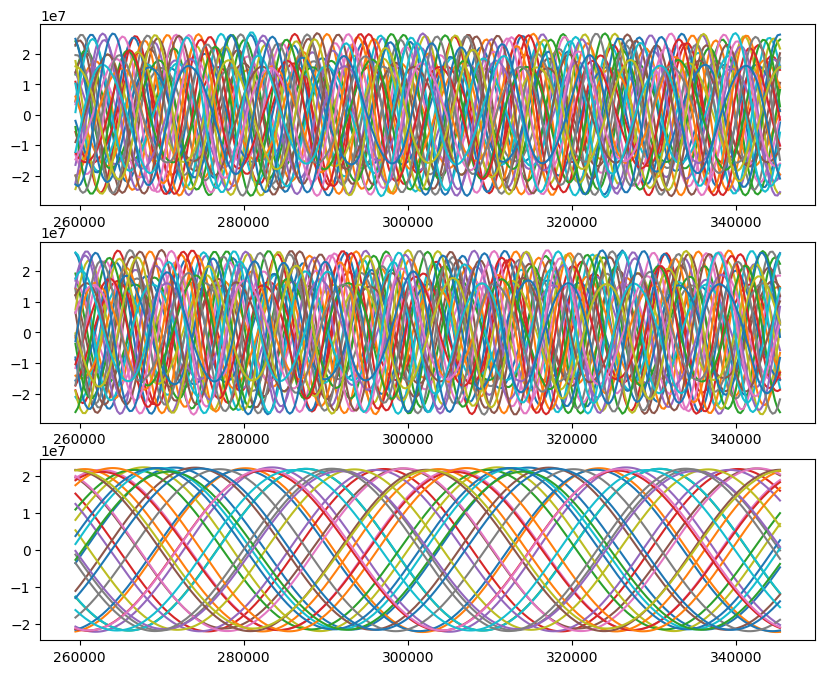

In [142]:
fig, axs = plt.subplots(3, figsize=(10, 8))
for svId in range(1, 33):
    sat = df[df.svId == svId]
    sat = sat[sat.TOW > 10]
    if not len(sat):
        continue
    for i in range(3):
        type = 'XYZ'[i]
        axs[i].plot(sat.TOW, sat[type], label=svId)
plt.savefig('b.png', dpi=600)

[259500.0, 259800.0, 260100.0, 260400.0, 260700.0, 261000.0, 261300.0, 261600.0, 261900.0, 262200.0, 262500.0, 262800.0, 263100.0, 263400.0, 263700.0, 264000.0, 264300.0, 264600.0, 264900.0, 265200.0, 265500.0, 265800.0, 266100.0, 266400.0, 266700.0, 267000.0, 267300.0, 267600.0, 267900.0, 268200.0, 268500.0, 268800.0, 269100.0, 269400.0, 269700.0, 270000.0, 270300.0, 270600.0, 270900.0, 271200.0, 271500.0, 271800.0, 272100.0, 272400.0, 272700.0, 273000.0, 273300.0, 273600.0, 273900.0, 274200.0, 274500.0, 274800.0, 275100.0, 275400.0, 275700.0, 276000.0, 276300.0, 276600.0, 276900.0, 277200.0, 277500.0, 277800.0, 278100.0, 278400.0, 278700.0, 279000.0, 279300.0, 279600.0, 279900.0, 280200.0, 280500.0, 280800.0, 281100.0, 281400.0, 281700.0, 282000.0, 282300.0, 282600.0, 282900.0, 283200.0, 283500.0, 283800.0, 284100.0, 284400.0, 284700.0, 285000.0, 285300.0, 285600.0, 285900.0, 286200.0, 286500.0, 286800.0, 287100.0, 287400.0, 287700.0, 288000.0, 288300.0, 288600.0, 288900.0, 289200.0,

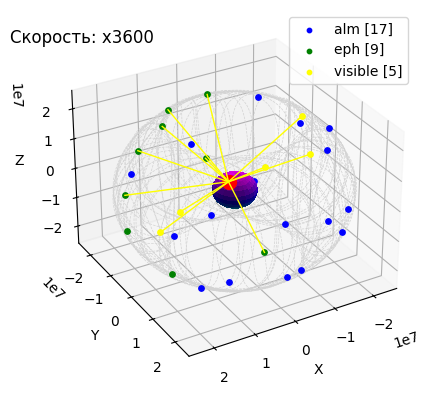

In [187]:
import Constants
from matplotlib.colors import LightSource


# Создаем фигуру и оси
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

TIME = df.TOW.unique().tolist()
print(TIME)
print(len(TIME))
print(len(TIME)/15)
# Отрисовываем сферу с текстурой
surface = ax.plot_surface(x, y, z, rstride=4, cstride=4, linewidth=0, antialiased=False)
# ax.plot_surface(x, y, z, c=earth_texture)

sats = df[df.TOW == TIME[0]]
# global points 
# points = ax.scatter(sats.alm_x, sats.alm_y, sats.alm_z, color='blue')

def get_color(row):
    if row['eph']:
        return 'green'  
    elif row['visible']:
        return'yellow'
    else:
        return 'blue'
print(Constants.ECEF)
# Функция для обновления анимации
def update(time, ax):
    alm = 0
    eph = 0
    visible = 0
    # time = 259500
    ax.cla()
    ax.clear()
    # global points
    sats = df[df.TOW == time]
    # sats = sats[sats.svId == 4]
    # sats = sats[sats.svId >= 25]
    
    ls = LightSource(azdeg=0, altdeg=45)  # Устанавливаем угол направления света
    surface = ax.plot_surface(x, y, z, rstride=4, cstride=4, linewidth=0, antialiased=False, facecolors=ls.shade(z, cmap=plt.cm.cool), zorder=-1, alpha=1)
    
    # ax.plot([Constants.ECEF[0]]*2, [Constants.ECEF[1]]*2, [-2.5e7, 2.5e7], color='red')

    for svId in range(1, 33):
        sat = sats[sats.svId == svId]
        if not len(sat):
            continue
        sat = sat.iloc[0]
        color = get_color(sat)
        ax.scatter(sat.X, sat.Y, sat.Z, color=color, s=15)
        
        if sat.visible:
            ax.plot([Constants.ECEF[0], sat.X], [Constants.ECEF[1], sat.Y], [Constants.ECEF[2], sat.Z], color='yellow', zorder=100, linewidth=1)
        
        d = df[df.svId == svId]
        # if svId > 29:
        ax.plot(d.X, d.Y, d.Z, linewidth=0.5, color='lightgrey', linestyle='--')
        
        if sat.eph:
            eph += 1
        elif sat.visible:
            visible += 1
        else:
            alm += 1
        
    # ax.scatter(sats.alm_x, sats.alm_y, sats.alm_z)
    # np
    # points._offsets3d = ([], [], [])

    # colors = sats.apply(get_color, axis=1).tolist()
    
    # points = ax.scatter(
    #     sats.X, sats.Y, sats.Z,
    #     color=colors
    # )
    for i in range(3):
        ax.scatter(0, 0, 0, color=['blue', 'green', 'yellow'][i], s=10, label=[f'alm [{alm}]', f'eph [{eph}]', f'visible [{visible}]'][i])
    ax.legend()
    
    ax.set_xlim3d(-2.5e7, 2.5e7)
    ax.set_ylim3d(-2.5e7, 2.5e7)
    ax.set_zlim3d(-2.5e7, 2.5e7)
    
    ax.scatter(*Constants.ECEF, color='red', s=100, zorder=2000)

    # points._offsets3d = (sats.alm_x, sats.alm_y, sats.alm_z)
    # colors = sats.apply(get_color, axis=1)
    # points.set_color(colors.tolist())
    # print(time, colors.tolist())
    
    ax.view_init(azim=60)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.text2D(0.1, 0.9, 'Скорость: x3600', transform=ax.transAxes, fontsize=12,
          verticalalignment='bottom', horizontalalignment='center')
    
    
update(TIME[0], ax)
# update(239100, ax)
# Создаем анимацию
ani = FuncAnimation(fig, update, frames=TIME, fargs=(ax, ), interval=1)#np.arange(0, 3600*24, 300)
# ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 10), fargs=(ax, ), interval=1)#np.arange(0, 3600*24, 300)

# Создаем объект writer для сохранения анимации в формате GIF
writer = PillowWriter(fps=12)
# plt.annotate('Скорость: x3600', xy=(0.5, 0), xytext=(0, 20),
#              xycoords='axes fraction', textcoords='offset points',
#              ha='center', va='bottom', fontsize=12)

# Сохраняем анимацию в файл
ani.save('animation.gif', writer=writer, dpi=300)#, bbox_inches='tight')
# ani.save('animation.gif', writer='imagemagik', dpi=300, fps=12)#transparent=True)
# plt.savefig('c.png', dpi=300, transparent=False)
plt.show()



In [139]:
# Сохраняем анимацию в файл
ani.save('animation2.gif', writer=writer, dpi=600)
# plt.savefig('a.png', dpi=600)
# plt.show()

In [4]:
import ipyvolume as ipv
import numpy as np

In [5]:
X = np.arange(-5, 5, 0.25*1)
Y = np.arange(-5, 5, 0.25*1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

In [20]:
ipv.figure()
ipv.plot_surface(X, Z, Y, color="orange")
ipv.plot_wireframe(X, Z, Y, color="red")
ipv.show()

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [6]:
import PIL.Image
import requests
import io


image = PIL.Image.open('textures/8k_earth_daymap.jpg')

import ipyvolume as ipv
import numpy as np

fig = ipv.figure()
ipv.style.use('dark')
# we create a sequence of 8 u v coordinates so that the texture moves across the surface.
u = np.array([X/5 +np.sin(k/8*np.pi)*4. for k in range(8)])
v = np.array([-Y/5*(1-k/7.) + Z*(k/7.) for k in range(8)])
mesh = ipv.plot_mesh(X, Z, Y, u=u, v=v, texture=image, wireframe=False)
ipv.animation_control(mesh, interval=800, sequence_length=8)
ipv.show()

Container(children=[HBox(children=(Play(value=0, interval=800, max=7), IntSlider(value=0, max=7)))], figure=Fi…